# PCA of the Us Arrest data set

## Importing libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

## Loading data

In [2]:
df = pd.read_csv('UsArrests.csv')

In [3]:
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Preprocessing

### Checking missing values

<AxesSubplot:>

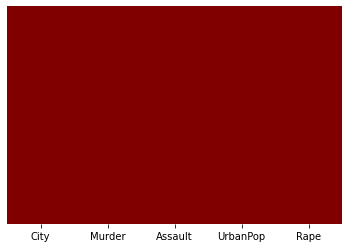

In [4]:
# Heatmap showing missing data
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'jet_r')

There is no missing values in the data.

### standardize data

In [5]:
# Selecting daa to be standardized
x = df.iloc[:,1:4].values

# Standardizing data
x_std = StandardScaler().fit_transform(x)

## Inspecting data

### Correlation heatmap

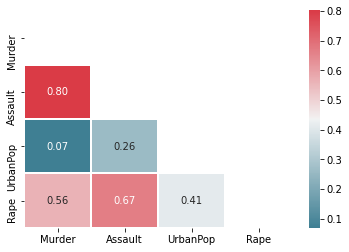

In [6]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # Plot figsize
  fig, ax = plt.subplots()

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

Based on the heatmap there is a strong correlation between assualt and murder. The remainder of the varaibles have a slightly possitive or slightly negative correlation.

This would suggest that the main factor that influences this data is the murder and assault rate.

## Determining the number of clusters for PCA

### Complete linkage

Text(0, 0.5, 'Euclidean distances')

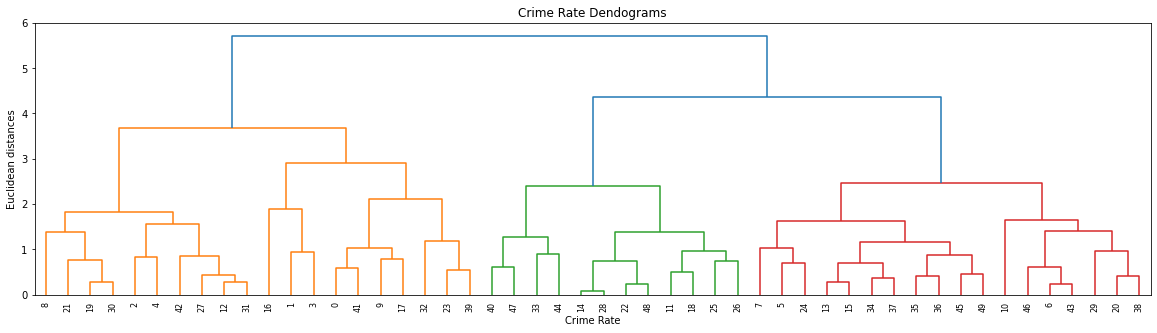

In [10]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = dendrogram(linkage(x_std, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

### Average linkage

Text(0, 0.5, 'Euclidean distances')

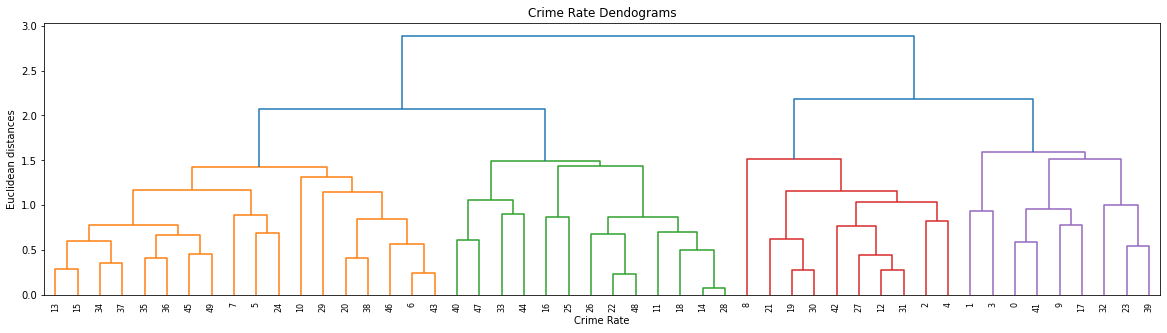

In [12]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = dendrogram(linkage(x_std, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

## Applying PCA

In [13]:
# choose number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(x_std)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,0,1,2
0,1.250806,0.934121,0.201506
1,0.800659,1.394192,-0.653267
2,1.354277,-0.836895,-0.848878
3,0.034741,1.117667,-0.187653
4,1.542818,-1.517845,-0.423165


Based on the data in the table. The components are uncorrelated.

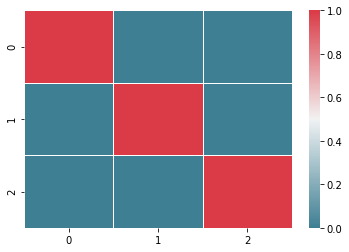

In [14]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

## Conclusion

Based on the diagrams and PCA above there is no clear link between the different types of crimes. The numbers might be linked to other socio-economic factors.

The dataset does note include any other items to look at and may be the reason for the outcome of this PCA.